## Exploratory Data Analysis On Mac Donald's  Sales Data

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display  import display,Markdown
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

## ---
#  Step 1: Loading The Dataset
## ---

In [2]:
df=pd.read_csv('Mcd_Sales_Dataset.csv')

In [3]:
# Setting the visualization Style
sns.set_style('whitegrid')

In [4]:
# Getting Few Rows Of The Dataset
display(Markdown("# Displaying First  Few Rows Of The Dataset"))
df.head()

# Displaying First  Few Rows Of The Dataset

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
display(Markdown(" ## Getting Basic Information Of Dataset"))
df.info()

 ## Getting Basic Information Of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

## --- 
# Step 2: Data Cleaning
## ---

# Task A . Checking For The Null Values

In [6]:
# Checking For The Null Values
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

## Visualize if there Present Any Null Values

<Axes: >

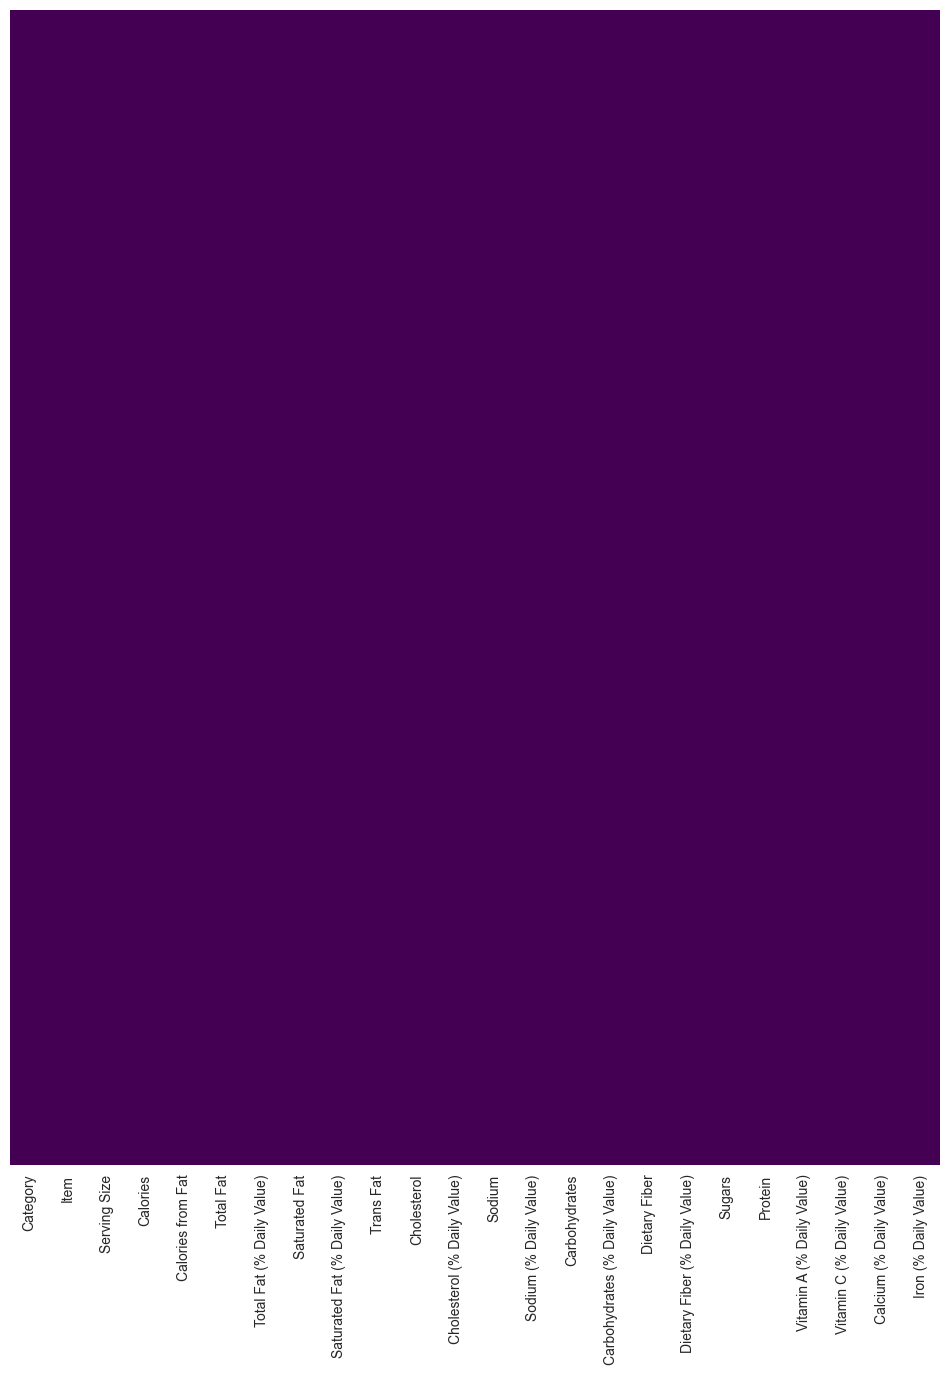

In [7]:
display(Markdown("## Visualize if there Present Any Null Values"))
plt.figure(figsize=(12,15))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

 Observation ( Null Values  ) --> There is No Null Values 


# Task 2 : Checking For Duplicates Values


In [8]:
duplicates=df.duplicated().sum()
print(f"No. of Rows With Duplicates Values Are : {duplicates}")

No. of Rows With Duplicates Values Are : 0


In [9]:
# Droping Duplicates if any
if duplicates>0:
    df= df.drop_duplicates()
    print("All the Duplicates Had Been Removed")

Observation ( Duplicates ) --> There Is No Duplicates Values

In [10]:
# Displaying The Cleaned Dataset
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## ---
# Step 3 : Descriptive Statistics
## ---

In [11]:
# Performing  Some Basics Statistics
display(Markdown("Some Basic Statistical Calculation Are ---"))
df.describe()

Some Basic Statistical Calculation Are ---

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [12]:
# Checking Modes For Each Column 
display(Markdown("# Displaying Most common Category For each column"))
df.mode().iloc[0]

# Displaying Most common Category For each column

Category                                Coffee & Tea
Item                             1% Low Fat Milk Jug
Serving Size                            16 fl oz cup
Calories                                         0.0
Calories from Fat                                0.0
Total Fat                                        0.0
Total Fat (% Daily Value)                        0.0
Saturated Fat                                    0.0
Saturated Fat (% Daily Value)                    0.0
Trans Fat                                        0.0
Cholesterol                                      0.0
Cholesterol (% Daily Value)                      0.0
Sodium                                         180.0
Sodium (% Daily Value)                           6.0
Carbohydrates                                    0.0
Carbohydrates (% Daily Value)                   14.0
Dietary Fiber                                    1.0
Dietary Fiber (% Daily Value)                    0.0
Sugars                                        

## ---
# Step 4 : Time Series Analsis (If Applicable) 
## ---

In [13]:
# Check if there is any 'Date' Column to perform Time Series Analysis
if 'Date' in df.columns:
    df['Date']=pd.to_datetime(df['Date']) # Convert To Date Time Format
    df.set_index('Date',inplace=True)
else:
    display(Markdown(" # NO 'Date' column found, Skipping time series analysis"))

 # NO 'Date' column found, Skipping time series analysis

## ---
# Step 5 : Customer And Product Analysis
## --- 

In [14]:
# Analyze customer demographics and purchasing behaviour (if such columns are availiable)
if 'CustomerID' in df.columns and 'ProductID' in df.columns:
    print("\n Customer And Product Analysis :")
    customer_counts=df['CustomerID'].value_counts()
    product_counts=df['ProductID'].value_counts()
    print("Top Customer by purchase counts : ")
    display(customer_counts.head())
    print("Top Products by sales counts : ")
    display(customer_counts.head())
else:
    display(Markdown("# No Customer or Product Id found, Skipping customer and product analsis "))

# No Customer or Product Id found, Skipping customer and product analsis 

## ---
# Step 6 :  Visualizing datasets to illustrate customer segemnts
## ---

In [15]:
# Displaying different cols present in dataset
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

# Distribution of Calories

Text(0.5, 1.0, " Distribution of Calories on 'McDonald's' Menu  ")

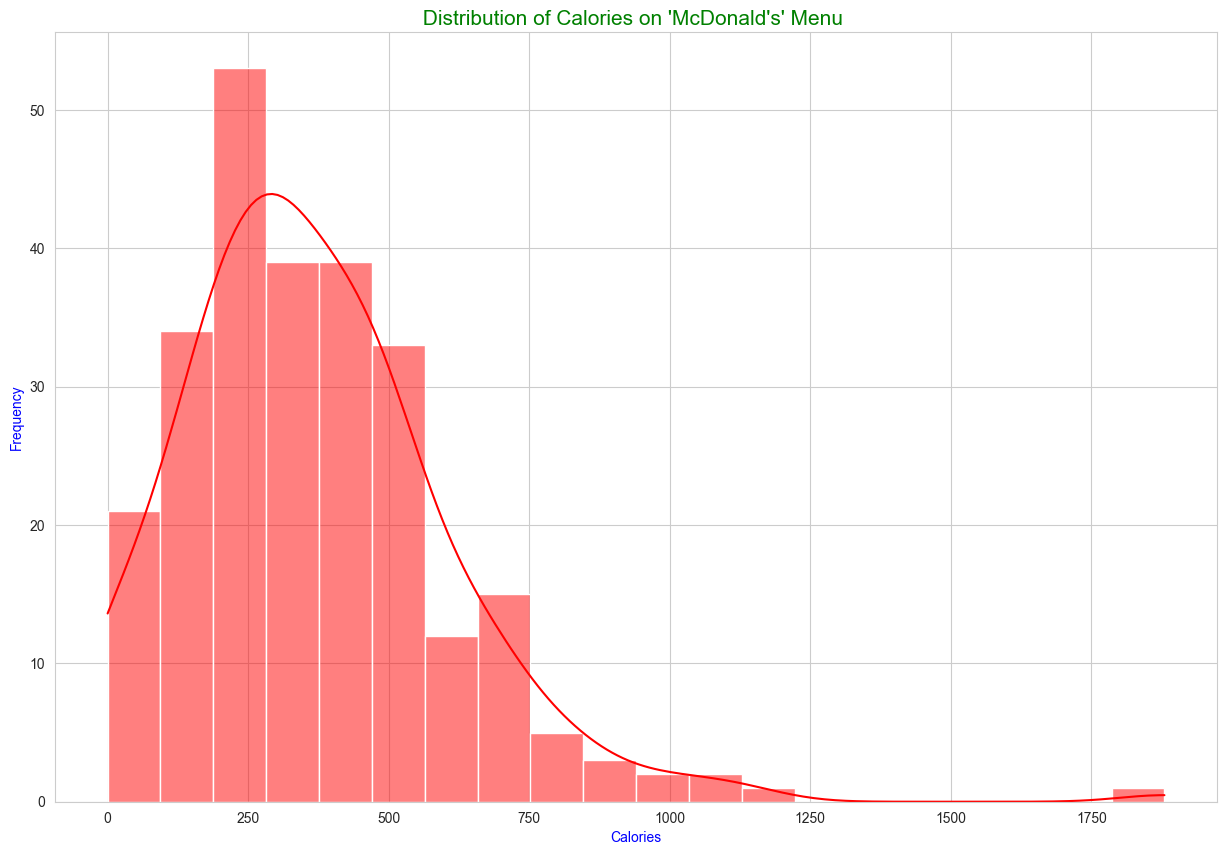

In [16]:
plt.figure(figsize=(15,10))
sns.histplot(data=df,x='Calories',bins=20,kde=True,color='red')
plt.xlabel('Calories',color='blue',fontsize=10)
plt.ylabel('Frequency',color='blue',fontsize=10)
plt.title(" Distribution of Calories on 'McDonald's' Menu  ",pad=5,color='green',fontsize=15)


## Protein Distribution by Category

In [17]:
# Group by 'Category' & sum the 'Protein'
protein_by_category=df.groupby('Category')['Protein'].sum()
protein_by_category

Category
Beef & Pork           410
Beverages              36
Breakfast             834
Chicken & Fish        786
Coffee & Tea          842
Desserts               28
Salads                119
Smoothies & Shakes    304
Snacks & Sides        109
Name: Protein, dtype: int64

# Plotting the Pie Chart To Show the distribution of Protein By Category

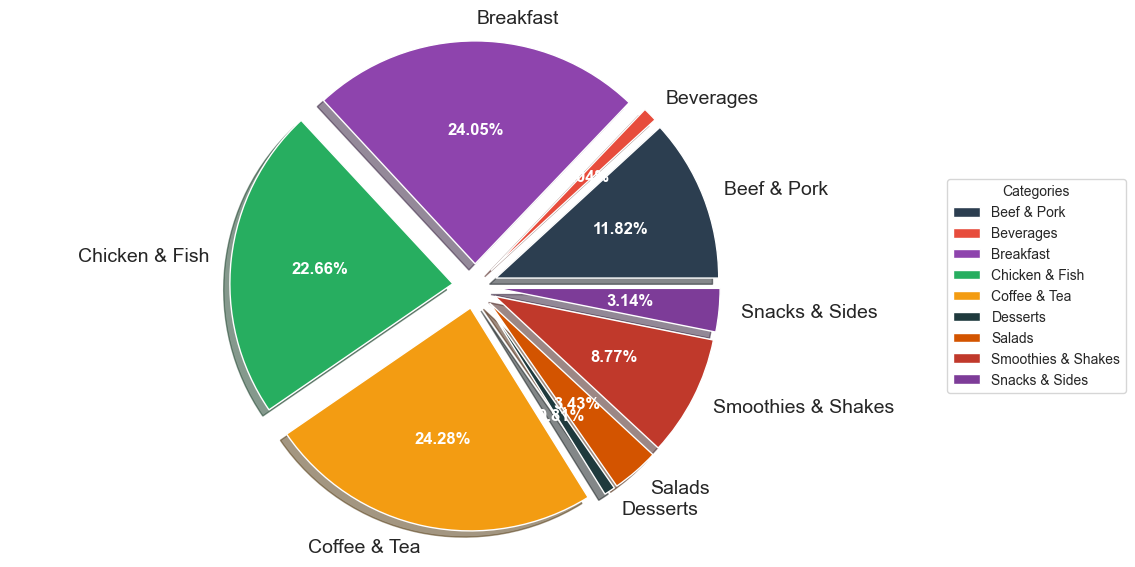

In [18]:
colors = ['#2C3E50', '#E74C3C', '#8E44AD', '#27AE60', '#F39C12','#1F3A3D',
          '#D35400', '#C0392B', '#7D3C98','#16A085']






#plotting the pie chart
plt.figure(figsize=(12,7))
wedges,texts,autotexts=plt.pie(
    x=protein_by_category,
    labels=protein_by_category.index,
    autopct='%1.2f%%',
    explode= [0.1]* len(protein_by_category),
    shadow=True,
    colors=colors
)
# BeautyFying The Pie Chart
plt.setp(autotexts,size=12,color='white',weight='bold')
plt.setp(texts,size=14)
plt.axis('equal')

#Add a legends
plt.legend(wedges,protein_by_category.index,title='Categories',loc='center left',bbox_to_anchor=(1,0,0.5,1))



# Plotting Box Plot Calories By Category

Text(0, 0.5, 'Calories')

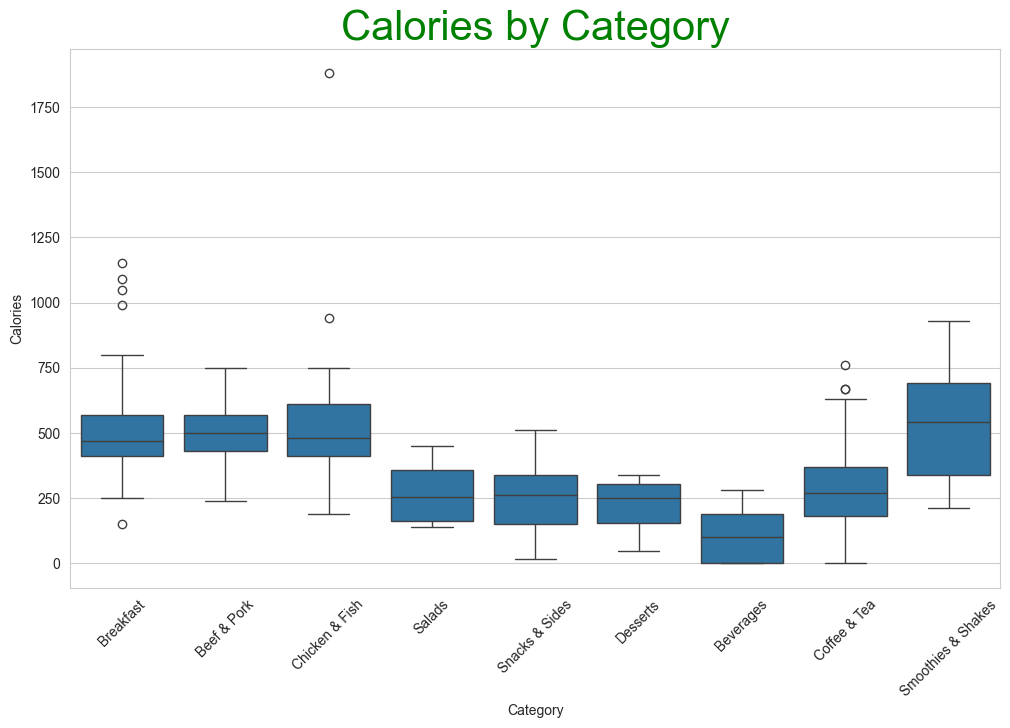

In [19]:
# Boxplot of Calories by Category
plt.figure(figsize=(12,7))
sns.boxplot(data=df,x='Category',y='Calories')
plt.title('Calories by Category',color='green',size=30)
plt.xticks(rotation=45)
plt.ylabel('Calories')


# Plotting Heatmap 


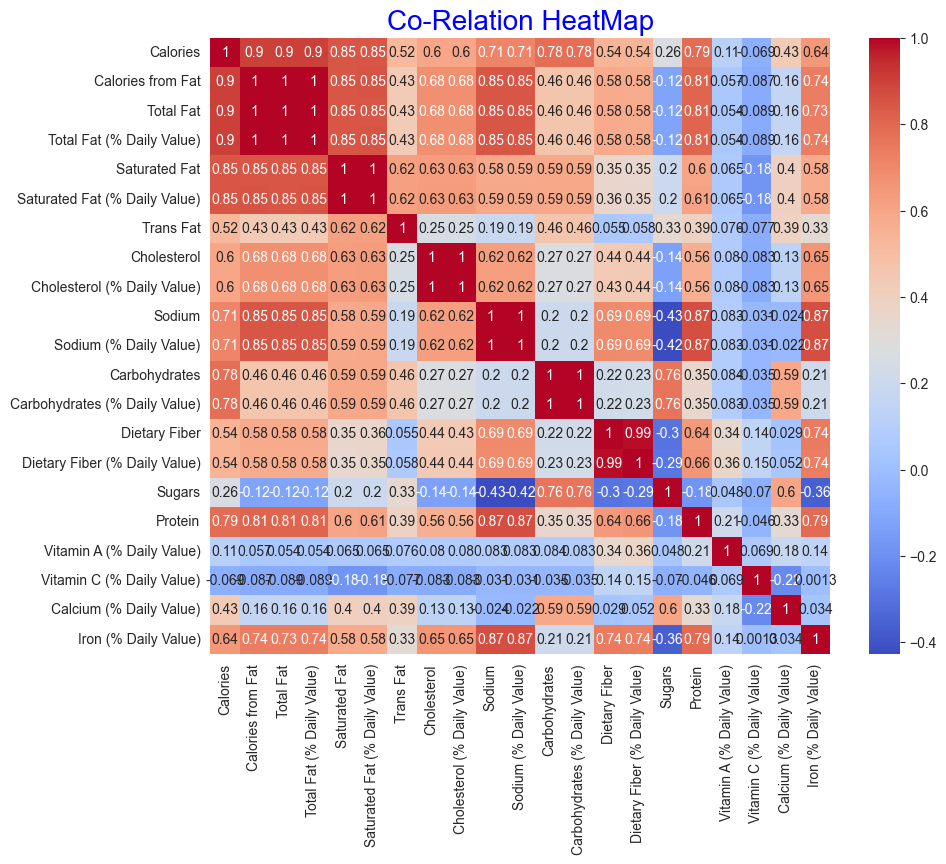

In [20]:
# Heatmap
plt.figure(figsize=(10,8))
co_relation_Matrix=df.corr(numeric_only=True)
if not co_relation_Matrix.empty:
    sns.heatmap(co_relation_Matrix,cmap='coolwarm',annot=True)
    plt.title('Co-Relation HeatMap',size=20,color='blue')
else:
    print("No numeric columns available for corelation heatmap")


# Plotting PCA of Nutritional Features


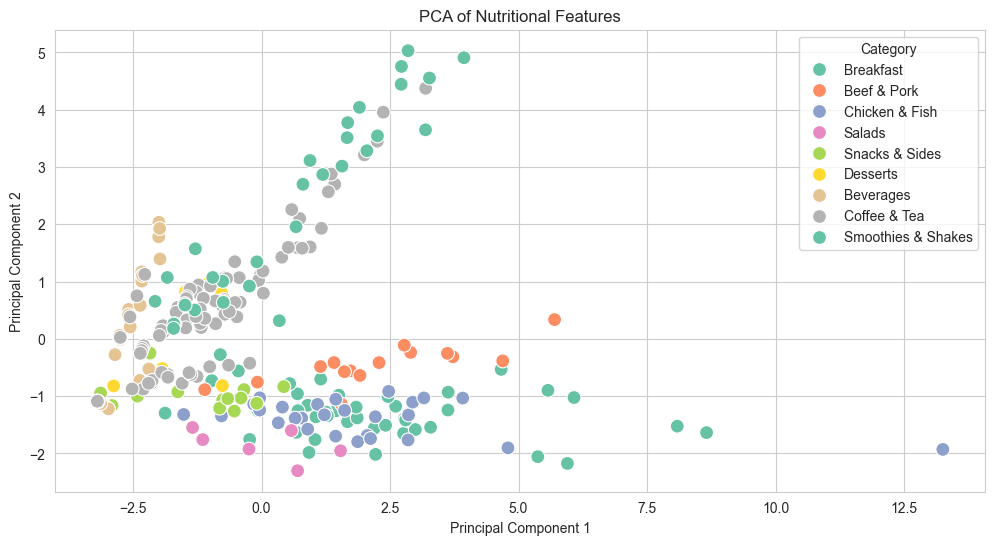

In [21]:
# Specify nutritional features for PCA
nutrition_features = [
    'Calories', 
    'Total Fat', 
    'Saturated Fat', 
    'Trans Fat', 
    'Cholesterol', 
    'Sodium', 
    'Carbohydrates', 
    'Dietary Fiber', 
    'Sugars', 
    'Protein'
]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[nutrition_features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Category'] = df['Category']

# Scatter plot of PCA results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Category', palette='Set2', s=100)
plt.title('PCA of Nutritional Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category')
plt.show()

# Nutritional Information Scatter Plot by Category

In [22]:
# scatter plot
fig = px.scatter(df, 
                  x="Calories", 
                 y="Total Fat", 
                 size="Sugars", 
                 color="Category",  # Use Category for color coding
                 hover_name="Item",
                 title="Nutritional Information Scatter Plot by Category",
                 labels={"Calories": "Calories (kcal)", "Total Fat": "Total Fat (g)"},
                 size_max=30)
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=700,  # Set the height of the plot
    title_font=dict(size=24),
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    legend_title_font=dict(size=16),
    font=dict(size=14)  # General font size
)

# Show the plot
fig.show()

# Recommendations

In [23]:
# Additional visualizations can be added based on specific columns, e.g., bar charts of product categories

# Step 6: Recommendations
print("\nRecommendations:")
print("1. Focus on healthier, lower-calorie options if there is customer demand for such items.")
print("2. Adjust marketing efforts based on the popularity of certain product categories.")
print("3. Consider offering promotions on items with high popularity to boost sales.")
print("4. Review customer demographic preferences to tailor product offerings.")


Recommendations:
1. Focus on healthier, lower-calorie options if there is customer demand for such items.
2. Adjust marketing efforts based on the popularity of certain product categories.
3. Consider offering promotions on items with high popularity to boost sales.
4. Review customer demographic preferences to tailor product offerings.


## ----------------------------------------------------
# Exploratory Data Analysis is Completed
## ----------------------------------------------------